In [130]:
# 4.1 (12 points) The file www.nbi.dk/~petersen/data_LargestPopulation.csv contains data on
# the Indian and Chinese population each year in the period 1960-2021.
# • Linearly fit the Indian population 1963-1973, and estimate the data point uncertainty.
# • Assuming an uncertainty of +-1000000 on all data points, give your best estimate of when
# the Indian population overtakes the Chinese, possibly with uncertainty.

In [131]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [132]:
url="http://www.nbi.dk/~petersen/data_LargestPopulation.csv"
dataframe = pd.read_csv(url)
dataframe

,Year,PopIndia,PopChina
0,1960,445954560,654170700
1,1961,456351870,655260350
2,1962,467024200,664614660
3,1963,477933630,683903550
4,1964,489059300,704593800
...,...,...,...
57,2017,1354195700,1410276000
58,2018,1369003300,1417069400
59,2019,1383112100,1421864100
60,2020,1396387100,1424929800


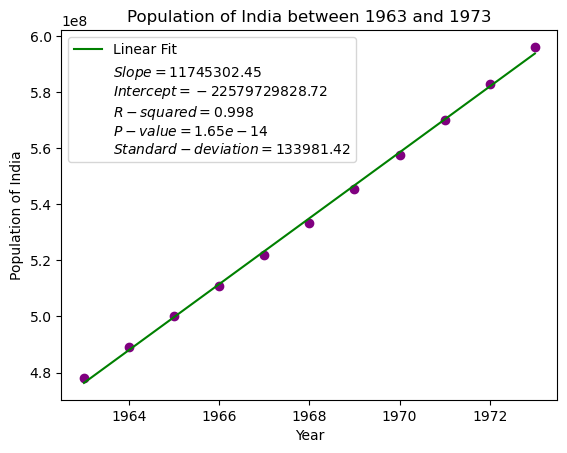

In [133]:
Year, PopIndia, PopChina=dataframe.values.T.astype(float)
#4.1.1
Study_year=Year[3:14]
Study_pop=PopIndia[3:14]

plt.scatter(Study_year, Study_pop, color='purple')
slope, intercept, r, p, std_dev = stats.linregress(Study_year, Study_pop)
plt.plot(Study_year, slope*Study_year + intercept, color='green', label='Linear Fit')
plt.xlabel('Year')
plt.ylabel('Population of India')
plt.title('Population of India between 1963 and 1973')
textstr = '\n'.join((
    r'$Slope=11745302.45$',
    r'$Intercept=-22579729828.72$',
    r'$R-squared=0.998$',
    r'$P-value=1.65e-14$',
    r'$Standard-deviation=133981.42$'))
plt.plot([], [], ' ', label=textstr)
plt.legend()
plt.show()


In [134]:
residuals=Study_pop-(slope*Study_year + intercept)
data_point_uncertainty=np.std(residuals)
print("Data point uncertainty: "+str(data_point_uncertainty))

Data point uncertainty: 1271059.3592353396


The year when the populations are the same: 2049


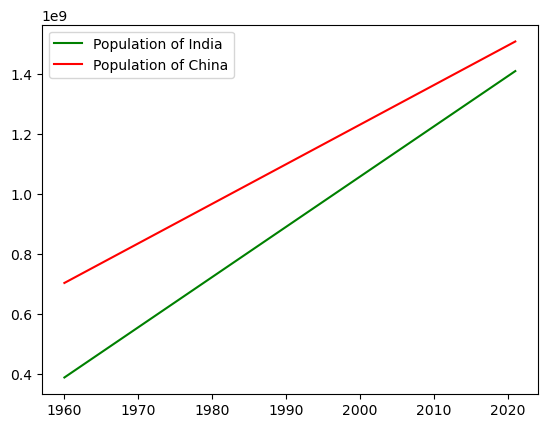

In [135]:
#4.1.2
slope_india, int_india, r1, p1, std1 = stats.linregress(Year, PopIndia)
slope_china, int_china, r2, p2, std2 = stats.linregress(Year, PopChina)
same_population_year=(int_china-int_india)/(slope_india-slope_china)
print("The year when the populations are the same: "+str(round(same_population_year)))
plt.plot(Year, slope_india*Year + int_india, color='green', label='Population of India')
plt.plot(Year, slope_china*Year + int_china, color='red', label='Population of China')
plt.legend()
plt.show()

In [136]:
nr_simulations = 10000
intersection_years = np.zeros(nr_simulations)
for i in range(nr_simulations):
    Sim_india = np.random.normal(PopIndia, 1000000) # simulate area1 data
    Sim_china = np.random.normal(PopChina, 1000000) # simulate area2 data
    sim_slope_india, int_sim_india = np.polyfit(Year, Sim_india, 1) # fit area1 simulation
    sim_slope_china, int_sim_china= np.polyfit(Year, Sim_china, 1) # fit area2 simulation
    intersection_years[i] = (int_sim_china - int_sim_india) / (sim_slope_india - sim_slope_china) # calculate intersection point

intersection_uncertainty = np.std(intersection_years)
print("Intersection year: ", same_population_year)
print("Intersection uncertainty: ", intersection_uncertainty)


Intersection year:  2048.808727074349
Intersection uncertainty:  0.17489721130280048
